In [1]:
from matplotlib import pyplot as plt

In [2]:
from pycbc import waveform
from pycbc.waveform import get_fd_waveform
import numpy as np
import lalsimulation as lalsim
import lal
import copy

In [3]:
par = {'mass1':50,
      'mass2':50,
      'spin1z':0,
      'spin2z':0.9,
      'delta_f':1/16,
      'distance':100,
      'f_lower':20}
lambda_g = 1e16
grapprox = 'SEOBNRv4_ROM'

hp, hc = get_fd_waveform(approximant=grapprox,
                                 **par)

hp_mg, _ = get_fd_waveform(approximant='massivegraviton',
                           baseapprox = grapprox,
                           lambda_g = lambda_g,
                           **par)

/work/yifan.wang/infotgr/env-py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Real h+(f)')

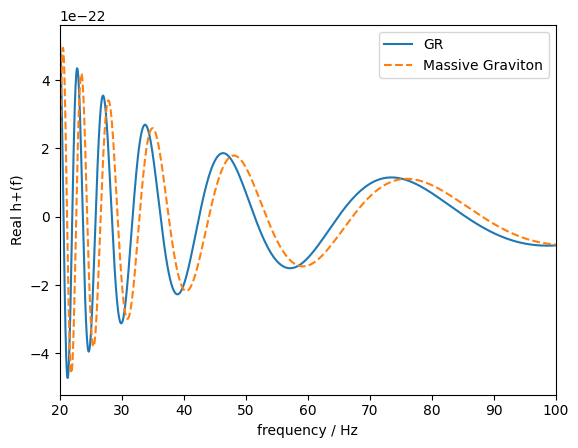

In [4]:
plt.plot(hp.sample_frequencies,hp,label='GR')
plt.plot(hp_mg.sample_frequencies,hp_mg,ls='--',label='Massive Graviton')
plt.xlim(20,100)
plt.legend()
plt.xlabel('frequency / Hz')
plt.ylabel('Real h+(f)')

# LALsuite

In [5]:
longAscNodes = 0
eccentricity = 0 
meanPerAno = 0
approx=lalsim.SEOBNRv4_ROM
nonGRdict = lal.CreateDict()

m1 = par['mass1']
m2 = par['mass2']
s1 = [0,0,par['spin1z']]
s2 = [0,0,par['spin2z']]
dist = par['distance']
iota = 0
phi_c = 0.

deltaF = par['delta_f']
f_high = 4096 ## f_LSO rounded to powers of two
Fs = 2*f_high
f_ref = par['f_lower']
f_low = par['f_lower']

hplus, hcross = lalsim.SimInspiralChooseFDWaveform(m1 * lal.MSUN_SI, m2 * lal.MSUN_SI,\
                                                          s1[0], s1[1], s1[2],\
                                                          s2[0], s2[1], s2[2],\
                                                          dist * 1e6 * lal.PC_SI, iota, phi_c,\
                                                          longAscNodes, eccentricity, meanPerAno,
                                                          deltaF, f_low, f_high, f_ref,\
                                                          nonGRdict, approx)
freqs = np.arange(0,f_high+deltaF,deltaF)

Text(0, 0.5, 'Real h+(f)')

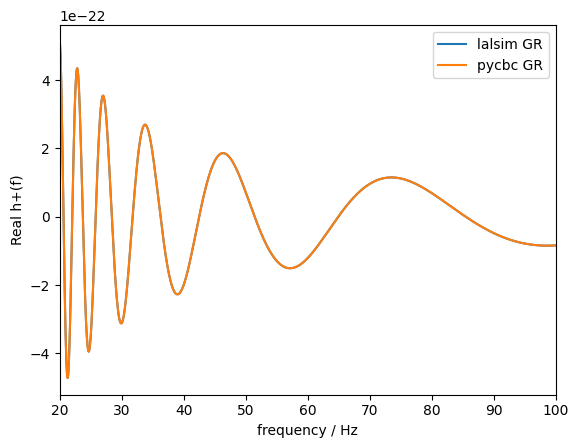

In [6]:
plt.plot(freqs,hplus.data.data,label='lalsim GR')
plt.plot(hp.sample_frequencies,hp,label='pycbc GR')
plt.xlim(20,100)
plt.legend()
plt.xlabel('frequency / Hz')
plt.ylabel('Real h+(f)')

In [7]:
par

{'mass1': 50,
 'mass2': 50,
 'spin1z': 0,
 'spin2z': 0.9,
 'delta_f': 0.0625,
 'distance': 100,
 'f_lower': 20}

In [8]:
lalsim.SimInspiralWaveformParamsInsertNonGRDChi2(nonGRdict,-1)

0

In [9]:
hplus_nongr, _ = lalsim.SimInspiralChooseFDWaveform(m1 * lal.MSUN_SI, m2 * lal.MSUN_SI,\
                                                          s1[0], s1[1], s1[2],\
                                                          s2[0], s2[1], s2[2],\
                                                          dist * 1e6 * lal.PC_SI, iota, phi_c,\
                                                          longAscNodes, eccentricity, meanPerAno,
                                                          deltaF, f_low, f_high, f_ref,\
                                                          nonGRdict, approx)

Text(0, 0.5, 'Real h+(f)')

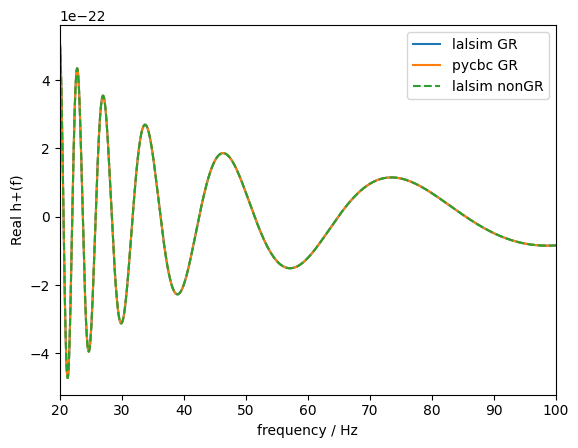

In [10]:
plt.plot(freqs,hplus.data.data,label='lalsim GR')
plt.plot(hp.sample_frequencies,hp,label='pycbc GR')
plt.plot(freqs,hplus_nongr.data.data,ls='--',label='lalsim nonGR')
plt.xlim(20,100)
plt.legend()
plt.xlabel('frequency / Hz')
plt.ylabel('Real h+(f)')

In [11]:
lalsim.SimInspiralTestingGRCorrections?

Docstring: SimInspiralTestingGRCorrections(COMPLEX16FrequencySeries htilde, UINT4 const l, UINT4 const m, REAL8 const m1_SI, REAL8 const m2_SI, REAL8 const chi1z, REAL8 const chi2z, REAL8 const f_low, REAL8 const f_ref, REAL8 const f_window_div_f_Peak, REAL8 const NCyclesStep, Dict LALpars) -> int
Type:      builtin_function_or_method

In [12]:
hplus_cache = copy.deepcopy(hplus.data.data)

In [17]:
hplalsim = hp.lal()

In [21]:
#hplus_cache = copy.deepcopy(hplus)
ret = lalsim.SimInspiralTestingGRCorrections(hplalsim,
                                       2,2,
                                       par['mass1']*lal.MSUN_SI,
                                       par['mass2']*lal.MSUN_SI, 
                                       par['spin1z'], 
                                       par['spin2z'], 
                                       par['f_lower'],#f_start, 
                                       par['f_lower'],#f_ref, 
                                       0.39, #https://arxiv.org/pdf/2109.06988.pdf 
                                       1,
                                       nonGRdict)

In [22]:
ret

0

/work/yifan.wang/infotgr/env-py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Real h+(f)')

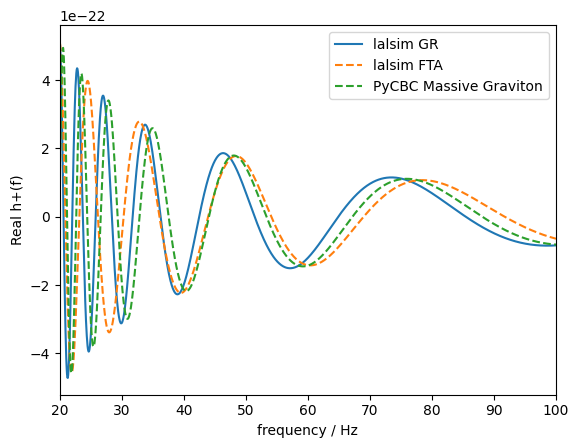

In [20]:
plt.plot(freqs,hplus_cache,label='lalsim GR')
plt.plot(freqs,hplus.data.data,ls='--',label='lalsim FTA')
plt.plot(hp_mg.sample_frequencies,hp_mg,ls='--',label='PyCBC Massive Graviton')
plt.xlim(20,100)
plt.legend()
plt.xlabel('frequency / Hz')
plt.ylabel('Real h+(f)')

In [26]:
hplalsim.deltaF

0.0625

In [28]:
float(hplalsim.epoch)

-16.0

In [30]:
from pycbc.types import FrequencySeries

In [36]:
new.dtype

dtype('complex128')

In [37]:
new = FrequencySeries(hplus.data.data,dtype='complex128',delta_f = hplus.deltaF,epoch=hplus.epoch)

In [38]:
new.dtype

dtype('complex128')

/work/yifan.wang/infotgr/env-py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Real h+(f)')

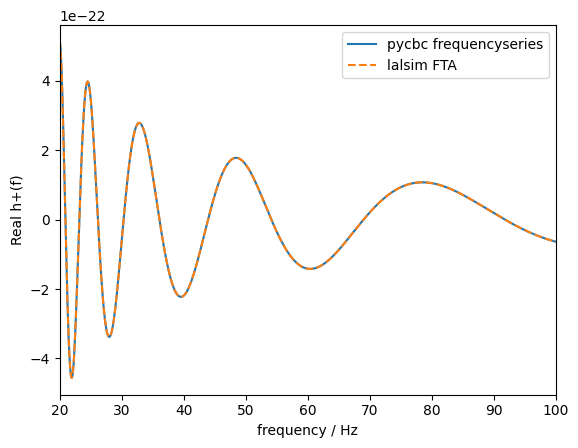

In [32]:
plt.plot(new.sample_frequencies,new,label='pycbc frequencyseries')
plt.plot(freqs,hplus.data.data,ls='--',label='lalsim FTA')
plt.xlim(20,100)
plt.legend()
plt.xlabel('frequency / Hz')
plt.ylabel('Real h+(f)')

In [33]:
new.epoch

LIGOTimeGPS(-16, 0)

In [34]:
new.delta_f

0.0625

In [41]:
hplus.data

<Swig Object of type 'tagCOMPLEX16Vector *' at 0x7f182e562f70>

In [45]:
hplus.data.data.dtype

dtype('complex128')